# <p style="text-align: center;"> <b> Question 02 </b></p>
---

## **Table of Contents**



---

# 1. Question

How should artists choose their music genres?

## 1.1 Purpose of the question

In guiding artists in their musical genre selection, this question aims to provide insights that will assist them in shaping their artistic identity. By addressing this question, artists can make informed decisions about whether to pursue genres aligned with their personal style, focus on their strengths, explore a diverse range of genres, or venture into currently popular and trending music styles.


## 1.2 How to answer the question

To answer this, we'll break it down into two questions:

1. **Choosing Personal vs. Trending Genres**:
    
    Should artists pick styles they personally like or go for what's popular?

2. **Focus vs. Diversification**:

    Is it better for artists to stick to a few styles they're good at, or should they try out a mix of different music styles?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Answer

## Load data

In [2]:
df = pd.read_csv('data/cleaned_dataset.csv')
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## **Question 2.1**: Should artists pick styles they personally like or go for what's popular?

🌟 To address this question, we will analyze the most popular artists in the dataset. We'll examine the genres they express in their songs, compare them with the currently most favored genres, and provide insights and conclusions based on these comparisons. 

The goal is to identify patterns in the musical choices of top artists and assess how their genre preferences align with or differ from the current popular trends.

### **Preprocessing data**

We'll start by performing some preprocessing steps to prepare the data for analysis. We need to extract:

-  **Top genres**: The most popular genres in the dataset
-  **Top artists**: The most popular artists in the dataset
-  **Genres of top artists**: The genres expressed in the songs of the top artists

**Top genres**

Popularity of genres is determined by the mean popularity of songs in each genre. We'll use the `groupby` function to group the data by genre and calculate the mean popularity of songs in each genre.

In [3]:
top_genres = df.groupby('track_genre')['popularity'].mean()
top_genres = top_genres[top_genres >= 40].sort_values(ascending=False)
top_genres[:10]

track_genre
pop-film     59.280280
k-pop        56.963928
chill        53.704705
sad          52.379000
grunge       49.582583
indian       49.528529
anime        48.766767
emo          48.128000
pop          47.903323
sertanejo    47.866000
Name: popularity, dtype: float64

To extract information about artists, the first step is to separate individual artists since each song may have multiple artists separated by semicolons (;)

In [4]:
copy_df = df.copy()
copy_df['artists'] = copy_df['artists'].str.split(';')
copy_df = copy_df.explode('artists')

After splitting the artists, we now can group the data by artist and calculate the mean popularity of songs by each artist to determine the top artists.

In [5]:
top_artists = copy_df.groupby('artists')['popularity'].mean()
top_artists = top_artists[top_artists >= 75].sort_values(ascending=False)
top_artists[:10]

artists
Quevedo             99.0
Bizarrap            99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
BYOR                87.0
Name: popularity, dtype: float64

In [6]:
top_artists = top_artists.index.tolist()
genres_artists = df[df['artists'].isin(top_artists)]['track_genre'].value_counts().index.to_list()
genres_artists[:10]

['alt-rock',
 'indie',
 'indie-pop',
 'rock',
 'alternative',
 'pop',
 'hip-hop',
 'k-pop',
 'country',
 'dance']

In [ ]:
!pip install matplotlib_venn

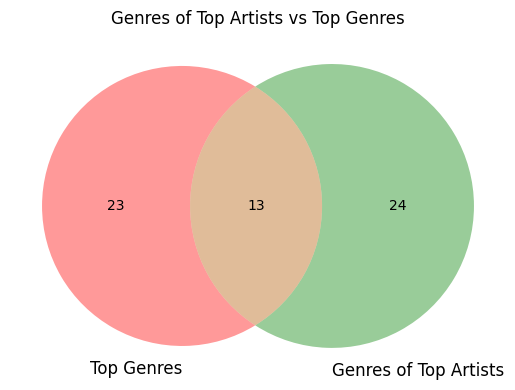

In [8]:
from matplotlib_venn import venn2
top_genres = top_genres.index.tolist()
venn2([set(top_genres), set(genres_artists)], set_labels=('Top Genres', 'Genres of Top Artists'))
plt.title('Genres of Top Artists vs Top Genres')
plt.show()


**Comment**

- 🎶 There's a noticeable overlap between popular music genres and those embraced by renowned artists. Out of 36 popular genres, **18** stand out not just as crowd favorites but also as the chosen realms of passion for celebrated artists. Moreover, these artists venture into 29 different genres, showcasing not only their alignment with trends but also their independence and creativity in discovering unique musical genres with a distinctive personal touch.

- 🎸 The fusion of popular music genres and the individual preferences of famous artists vividly illustrates the increasingly diverse and rich trends in the world of music. Artists fearlessly break boundaries, experimenting with new genres to craft unique musical masterpieces, each bearing their personal signature.

- 🌐 This not only enriches the musical landscape but also provides listeners with a diverse range of choices, from mainstream hits to distinctive creations. It fuels development and innovation within the music industry.


We will create a bar chart to visualize the popularity of genres falling into three categories:

- Exclusively belonging to the top genres.
- Exclusively belonging to genres of top artists.
- Belonging to both the top genres and genres of top artists.

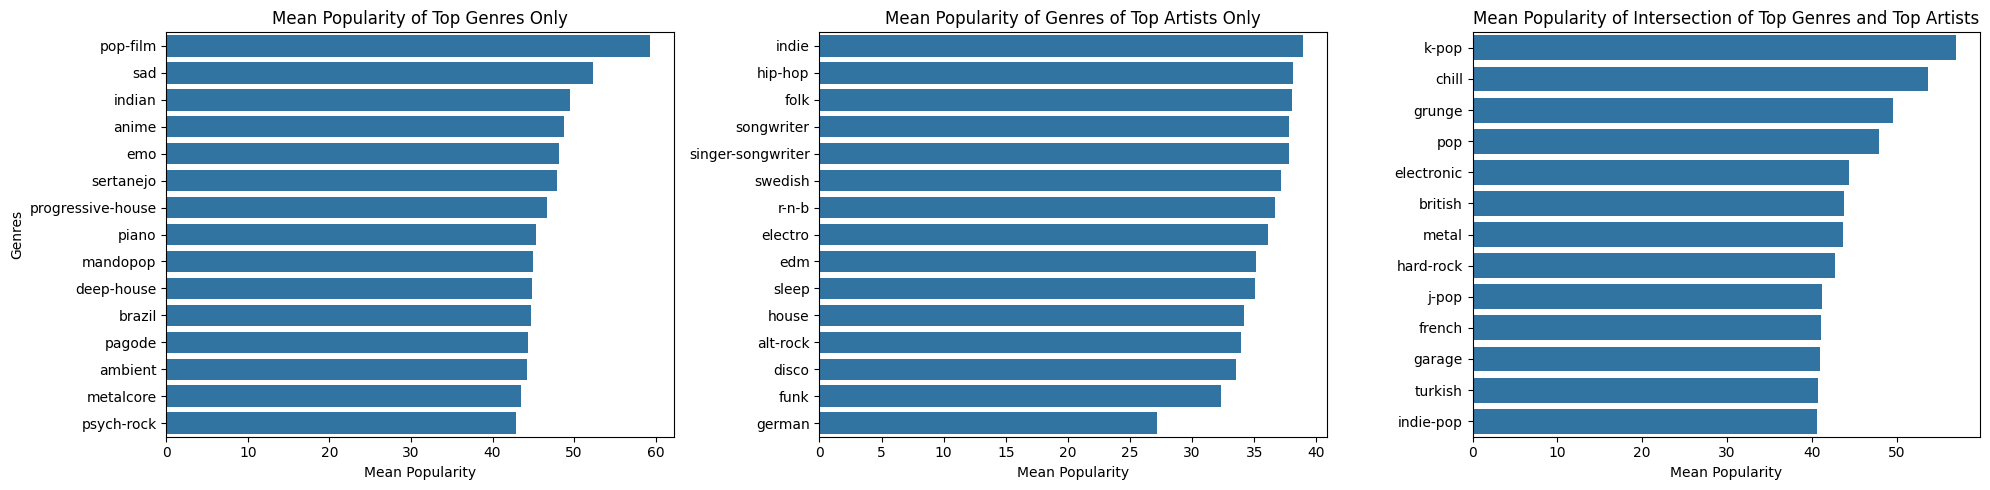

In [43]:
top_genres_only = list(set(top_genres) - set(genres_artists))
genres_artists_only = list(set(genres_artists) - set(top_genres))
intersection = list(set(top_genres) & set(genres_artists))

top_genres_only = df[df['track_genre'].isin(top_genres_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
genres_artists_only = df[df['track_genre'].isin(genres_artists_only)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)
intersection = df[df['track_genre'].isin(intersection)].groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=top_genres_only.values, y=top_genres_only.index, ax=axes[0])
axes[0].set_title('Mean Popularity of Top Genres Only')
axes[0].set_xlabel('Mean Popularity')
axes[0].set_ylabel('Genres')

sns.barplot(x=genres_artists_only.values, y=genres_artists_only.index, ax=axes[1])
axes[1].set_title('Mean Popularity of Genres of Top Artists Only')
axes[1].set_xlabel('Mean Popularity')
axes[1].set_ylabel('')

sns.barplot(x=intersection.values, y=intersection.index, ax=axes[2])
axes[2].set_title('Mean Popularity of Intersection of Top Genres and Top Artists')
axes[2].set_xlabel('Mean Popularity')
axes[2].set_ylabel('')


plt.tight_layout()
plt.show()


**Comment**

- The most popular music genres such as *pop-film*, *sad*, *Indian*, *anime*, etc., all exhibit an average popularity exceeding 40. This signifies strong favoritism from listeners towards these genres.

- Genres associated with the preferences of famous artists, such as *indie*, *hip-hop*, *folk*, etc., although popular, tend to have lower popularity compared to top genres. This could be attributed to the diversity in the musical preferences of artists, and listeners may choose to explore these genres through their creative works.

- Music genres that fall into both top genres and the preferences of famous artists, like *k-pop*, *chill*, *pop*, etc., often boast an average popularity exceeding 40. This can be explained by the broad appeal these genres have for audiences, and renowned artists frequently choose these genres to showcase their compositional talents.


### **Ansswer for question 2.1**

